# process all turtle XML files

In [1]:
import pandas as pd
import glob
import os
from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt

# Step 1 load xif data from jason file

![title]("img/picture.png")

In [2]:
surveys = pd.read_json("G:/drone/surveys/images.json")

In [3]:
surveys.GPSLongitude.head(5).str.split(' ',expand=True)


def get_longitude(item):
    longitude =float(item[0]) + float(item[2][0:-1])/60 + float(item[3][0:-1])/3600
    return (longitude)
surveys['longitude'] = pd.np.NAN
surveys['latitude'] = pd.np.NAN
surveys.loc[ ~surveys['GPSLongitude'].isna(),'longitude']=surveys.loc[ ~surveys['GPSLongitude'].isna(),'GPSLongitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)
surveys.loc[ ~surveys['GPSLatitude'].isna(),'latitude']=surveys.loc[ ~surveys['GPSLatitude'].isna(),'GPSLatitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)*-1
surveys =surveys[~surveys.longitude.isna()]

In [ ]:
myProj = Proj("+proj=utm +zone=49K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
surveys['easting'], surveys['northing'] = myProj(surveys['longitude'].values, surveys['latitude'].values)surveys['northing']

In [5]:
surveys['northing']

KeyError: 'northing'

In [155]:
%matplotlib notebook
# neds only 
#mask = (surveys.latitude>-21.964) & (surveys.latitude<-21.954)
#surveys = pd.DataFrame(surveys.loc[mask])
surveys['BaseName']=surveys.SourceFile.apply(os.path.basename)
surveys['BaseName']=surveys['BaseName'].str[0:-4]
surveys['area']=surveys['BaseName'].str.split('_',expand=True)[0]

In [156]:
surveys.BaseName.str.contains('ned').max()

True

In [157]:
files = glob.glob(r'T:\surveys\s*\*.xml',recursive=True)
len(files)

132

In [158]:
turtles =pd.DataFrame(files,columns=['path'])
turtles['BaseName']=turtles.path.apply(os.path.basename)
turtles['BaseName']=turtles['BaseName'].str[0:-4]
turtles =turtles.merge(surveys,on=['BaseName'])
turtles

,path,BaseName,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,area
0,T:\surveys\survey_02\neds_20170915T151240_0066...,neds_20170915T151240_0066,DJI Meta Data,54.75,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.5,113.923336,-21.977206,801892.364205,7.566812e+06,neds
1,T:\surveys\survey_02\neds_20170915T151243_0067...,neds_20170915T151243_0067,DJI Meta Data,54.85,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.923503,-21.977203,801909.592552,7.566812e+06,neds
2,T:\surveys\survey_02\neds_20170915T151245_0068...,neds_20170915T151245_0068,DJI Meta Data,54.75,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.5,113.923750,-21.977203,801935.139212,7.566812e+06,neds
3,T:\surveys\survey_02\neds_20170915T151248_0069...,neds_20170915T151248_0069,DJI Meta Data,54.75,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.923914,-21.977203,801952.074641,7.566811e+06,neds
4,T:\surveys\survey_02\neds_20170915T151340_0090...,neds_20170915T151340_0090,DJI Meta Data,54.85,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.5,113.928294,-21.977203,802404.739218,7.566803e+06,neds
5,T:\surveys\survey_02\neds_20170915T151343_0091...,neds_20170915T151343_0091,DJI Meta Data,54.85,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.928461,-21.977203,802421.961738,7.566802e+06,neds
6,T:\surveys\survey_02\neds_20170915T151345_0092...,neds_20170915T151345_0092,DJI Meta Data,54.85,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.928708,-21.977203,802447.508480,7.566802e+06,neds
7,T:\surveys\survey_02\neds_20170915T152137_0145...,neds_20170915T152137_0145,DJI Meta Data,56.84,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,-88.4,113.926011,-21.976511,802170.256682,7.566884e+06,neds
8,T:\surveys\survey_02\neds_20170915T152142_0146...,neds_20170915T152142_0146,DJI Meta Data,56.44,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,-24.2,113.925800,-21.976478,802148.512054,7.566888e+06,neds
9,T:\surveys\survey_02\neds_20170915T152441_0213...,neds_20170915T152441_0213,DJI Meta Data,56.94,False,2.8,2.8,8,NaN,NaN,...,72,Centered,YCbCr4:2:2 (2 1),72,-88.4,113.926444,-21.975703,802216.748640,7.566972e+06,neds


<IPython.core.display.Javascript object>


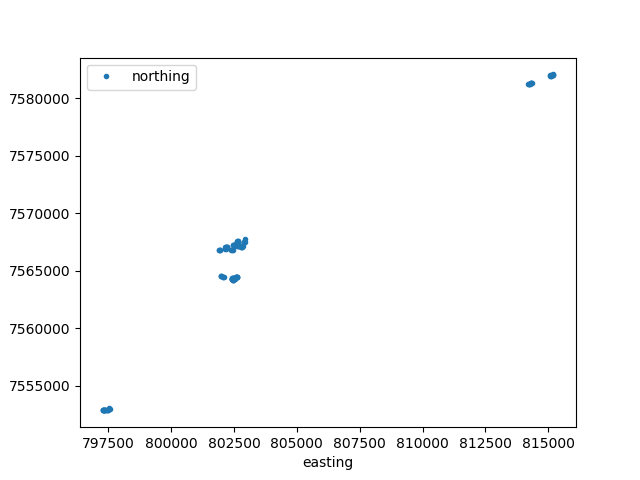

In [159]:
turtles.plot(x='easting',y='northing',marker ='.',linestyle='')

In [160]:

def get_turtle_xy(path):
    #print(path)
    with open(path, "r") as f: # opening xml file
        content = f.read()
    soup = b(content, "lxml")
    x = [];
    y = [];
    opath =[]
    objtype = []
    for obj in soup.findAll("object"):
        objtype.append(obj.find('name').text)
        opath.append(path) 
        x.append((int(obj.find('xmin').text) +int(obj.find('xmax').text))/2)
        y.append((int(obj.find('ymin').text) +int(obj.find('ymax').text))/2)
    return pd.DataFrame({'path':opath,'x':x,'y':y,'type':objtype})
output =list(turtles.path.apply(get_turtle_xy))
output =pd.concat(output)
output['BaseName']=output.path.apply(os.path.basename)
output['BaseName']=output['BaseName'].str[0:-4]

In [161]:
output =output.merge(turtles,on=['BaseName'])
output

,path_x,x,y,type,BaseName,path_y,About,AbsoluteAltitude,AlreadyApplied,Aperture,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,area
0,T:\surveys\survey_02\neds_20170915T151240_0066...,955.5,101.5,diving turtle,neds_20170915T151240_0066,T:\surveys\survey_02\neds_20170915T151240_0066...,DJI Meta Data,54.75,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.5,113.923336,-21.977206,801892.364205,7.566812e+06,neds
1,T:\surveys\survey_02\neds_20170915T151243_0067...,890.0,1091.0,diving turtle,neds_20170915T151243_0067,T:\surveys\survey_02\neds_20170915T151243_0067...,DJI Meta Data,54.85,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.923503,-21.977203,801909.592552,7.566812e+06,neds
2,T:\surveys\survey_02\neds_20170915T151245_0068...,820.0,2055.5,diving turtle,neds_20170915T151245_0068,T:\surveys\survey_02\neds_20170915T151245_0068...,DJI Meta Data,54.75,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.5,113.923750,-21.977203,801935.139212,7.566812e+06,neds
3,T:\surveys\survey_02\neds_20170915T151248_0069...,749.0,3033.0,diving turtle,neds_20170915T151248_0069,T:\surveys\survey_02\neds_20170915T151248_0069...,DJI Meta Data,54.75,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.923914,-21.977203,801952.074641,7.566811e+06,neds
4,T:\surveys\survey_02\neds_20170915T151340_0090...,1977.5,811.0,diving turtle,neds_20170915T151340_0090,T:\surveys\survey_02\neds_20170915T151340_0090...,DJI Meta Data,54.85,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.5,113.928294,-21.977203,802404.739218,7.566803e+06,neds
5,T:\surveys\survey_02\neds_20170915T151343_0091...,1919.0,1851.0,diving turtle,neds_20170915T151343_0091,T:\surveys\survey_02\neds_20170915T151343_0091...,DJI Meta Data,54.85,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.928461,-21.977203,802421.961738,7.566802e+06,neds
6,T:\surveys\survey_02\neds_20170915T151345_0092...,1851.5,2863.0,diving turtle,neds_20170915T151345_0092,T:\surveys\survey_02\neds_20170915T151345_0092...,DJI Meta Data,54.85,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,89.6,113.928708,-21.977203,802447.508480,7.566802e+06,neds
7,T:\surveys\survey_02\neds_20170915T152137_0145...,3472.0,647.0,diving turtle,neds_20170915T152137_0145,T:\surveys\survey_02\neds_20170915T152137_0145...,DJI Meta Data,56.84,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,-88.4,113.926011,-21.976511,802170.256682,7.566884e+06,neds
8,T:\surveys\survey_02\neds_20170915T152142_0146...,2649.5,1308.0,diving turtle,neds_20170915T152142_0146,T:\surveys\survey_02\neds_20170915T152142_0146...,DJI Meta Data,56.44,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,-24.2,113.925800,-21.976478,802148.512054,7.566888e+06,neds
9,T:\surveys\survey_02\neds_20170915T152441_0213...,4111.0,779.5,turtle,neds_20170915T152441_0213,T:\surveys\survey_02\neds_20170915T152441_0213...,DJI Meta Data,56.94,False,2.8,...,72,Centered,YCbCr4:2:2 (2 1),72,-88.4,113.926444,-21.975703,802216.748640,7.566972e+06,neds


In [162]:
output['rads']=np.deg2rad(output.FlightYawDegree)

In [163]:
output['dx']=((2432-output.x)/3666.666504)*output.RelativeAltitude
output['dy']=((1824-output.y)/3666.666504)*output.RelativeAltitude


In [164]:
    output['xx'] = output['dx'] * np.cos(output['rads']) +  output['dy'] * np.sin(output['rads'])
    output['xx'] =  output['easting'] + output['xx'] 
    output['yy'] = -output['dx'] * np.sin(output['rads']) + output['dy'] * np.cos(output['rads'])
    output['yy'] = output['northing'] + output['yy'] 

<IPython.core.display.Javascript object>


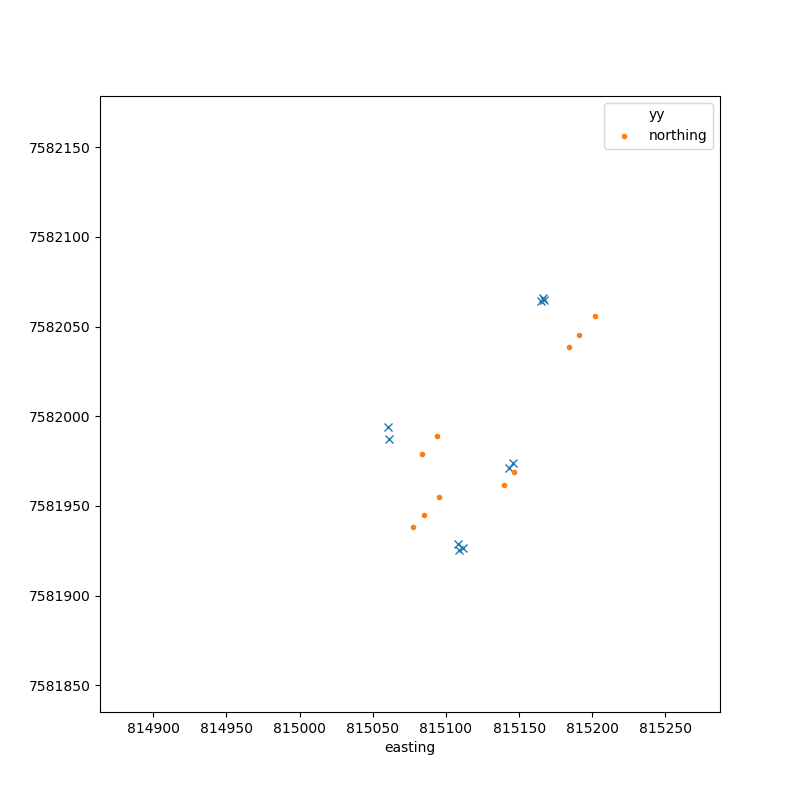

In [168]:
fig, ax = plt.subplots(figsize=(8,8))
output.plot(x='xx',y='yy',marker ='x',linestyle='',ax=ax)
turtles.plot(x='easting',y='northing',marker ='.',linestyle='',ax=ax)

In [111]:
output['dy'].head(10)

0    25.720058
1    10.965014
2    -3.456716
3   -18.052569
4    15.153560
5    -0.403895
6   -15.542496
7    18.245641
8     7.942648
9    16.220136
Name: dy, dtype: float64

In [112]:
output.head(10)

0    90.3
1    90.3
2    90.3
3    90.2
4    90.2
5    90.2
6    90.2
7   -91.2
8   -21.4
9   -91.2
Name: GimbalYawDegree, dtype: float64

In [114]:
output.FlightYawDegree

0       89.5
1       89.6
2       89.5
3       89.6
4       89.5
5       89.6
6       89.6
7      -88.4
8      -24.2
9      -88.4
10     -88.4
11     -88.4
12      90.0
13      90.0
14      89.7
15     -88.6
16     -88.6
17     -88.5
18     -88.5
19     106.1
20     106.0
21     -70.7
22     -70.6
23     -70.6
24     -70.6
25     -70.6
26     -70.6
27     -70.9
28      98.9
29     106.5
       ...  
119     35.4
120     35.4
121     35.3
122   -144.9
123   -174.4
124   -174.4
125   -173.9
126      7.2
127      7.2
128      6.8
129      6.8
130      7.1
131      7.1
132      6.9
133      6.9
134   -174.6
135   -174.6
136   -175.1
137   -175.1
138   -175.1
139   -174.3
140   -174.3
141   -174.3
142   -175.1
143      6.9
144      7.0
145      6.8
146      6.8
147    173.7
148      6.9
Name: FlightYawDegree, Length: 149, dtype: float64